In [2]:
import os
import pandas as pd
import glob

!rm -rf Positive Negative Twitter twitter_dataset.csv arabic_twitter_dataset.csv

!apt-get install unrar > /dev/null

print("unfolding")
rar_files = glob.glob("*.rar")
if rar_files:
    !unrar x -o+ "{rar_files[0]}" > /dev/null
    print(f" unfolded: {rar_files[0]}")
else:

    !unzip -o *.zip > /dev/null 2>&1
    print(" unfolded successfully (ZIP).")

print(" searching for the tweets")
data = []

for root, dirs, files in os.walk("."):
    for label in ['Positive', 'Negative']:
        if label in os.path.basename(root):
            for filename in files:
                try:
                    file_path = os.path.join(root, filename)
                    with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
                        text = f.read().strip()
                        if text:
                            data.append({'text': text, 'label': label})
                except: continue
        elif label in dirs:
             target_dir = os.path.join(root, label)
             for filename in os.listdir(target_dir):
                try:
                    file_path = os.path.join(target_dir, filename)
                    with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
                        text = f.read().strip()
                        if text:
                            data.append({'text': text, 'label': label})
                except: continue

if len(data) > 0:
    df = pd.DataFrame(data)
    df = df.sample(frac=1, random_state=42).reset_index(drop=True)
    df.to_csv('arabic_twitter_dataset.csv', index=False)
    print(f"success {len(df)} ")
    print(df.head())
else:
    print("failed")

KeyboardInterrupt: 

In [7]:
df

,text,label,clean_text,label_id
0,صباحك جمال و روعه,positive,صباحك جمال و روعه,1.0
1,باذن الله بديت ولو مؤخرا بنفسى الحمد لله,positive,باذن الله بديت ولو مءخرا بنفسي الحمد لله,1.0
2,﻿و طمّأنينَه صباح ٱلآملَ بًٱللِه و ٱلثِقةً,positive,﻿و طمانينه صباح ٱلامل بٱلله و ٱلثقه,1.0
3,أهلا وسهلا بك بيننا يا طارق,positive,اهلا وسهلا بك بيننا يا طارق,1.0
4,اللهم أبعد عنى شهوات الدنيا وقربنى منك وأغفر ل...,positive,اللهم ابعد عني شهوات الدنيا وقربني منك واغفر ل...,1.0
...,...,...,...,...
42015,الابليكيشن يدخلنا فى متاهات لا نفهم منها شيء ....,negative,الابليكيشن يدخلنا في متاهات لا نفهم منها شيء ...,0.0
42016,تجربة سيئة جدا منصحش اى حد بتحميل التطبيق النظ...,negative,تجربه سيءه جدا منصحش اي حد بتحميل التطبيق النظ...,0.0
42022,بعد ما اخدت الباقة الاولى ب ١٦٠ جنيه ٣٠ رحلة ب...,negative,بعد ما اخدت الباقه الاولي ب ١٦٠ جنيه ٣٠ رحله ب...,0.0
42024,الخدمة جيدة ولكن يرجى تعديل سلوك بعض السائقين ...,positive,الخدمه جيده ولكن يرجي تعديل سلوك بعض الساءقين,1.0


In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split

df = pd.read_csv('arabic_twitter_dataset.csv')

def clean_text(text):
    text = str(text)
    text = re.sub(r'[\u064B-\u065F\u0670]', '', text)
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("g", "q", text)
    text = re.sub(r'[^\u0600-\u06ff\u0750-\u077f\ufb50-\ufdff\ufe70-\ufeff\s]', '', text)
    return text.strip()

df['clean_text'] = df['text'].apply(clean_text)

label_map = {'positive': 1, 'negative': 0}
df['label_id'] = df['label'].map(label_map)

df.dropna(subset=['clean_text', 'label_id'], inplace=True)
df = df[df['clean_text'].str.len() > 2]

X_train, X_test, y_train, y_test = train_test_split(
    df['clean_text'], df['label_id'], test_size=0.2, random_state=42, stratify=df['label_id']
)

print(f" Data is ready:\n- Training set size: {len(X_train)}\n- Test set size: {len(X_test)}")
print("\nFirst 5 rows after cleaning:")
print(df[['text', 'clean_text', 'label_id']].head())

print("\nSample from training data (X_train):")
print(X_train.head())


 Data is ready:
- Training set size: 30392
- Test set size: 7598

First 5 rows after cleaning:
                                                text  \
0                                  صباحك جمال و روعه   
1           باذن الله بديت ولو مؤخرا بنفسى الحمد لله   
2         ﻿و طمّأنينَه صباح ٱلآملَ بًٱللِه و ٱلثِقةً   
3                        أهلا وسهلا بك بيننا يا طارق   
4  اللهم أبعد عنى شهوات الدنيا وقربنى منك وأغفر ل...   

                                          clean_text  label_id  
0                                  صباحك جمال و روعه       1.0  
1           باذن الله بديت ولو مءخرا بنفسي الحمد لله       1.0  
2                ﻿و طمانينه صباح ٱلامل بٱلله و ٱلثقه       1.0  
3                        اهلا وسهلا بك بيننا يا طارق       1.0  
4  اللهم ابعد عني شهوات الدنيا وقربني منك واغفر ل...       1.0  

Sample from training data (X_train):
17017    طلبت قبل فتره بسيطه من اخدي المطاعم وجت الطلبي...
36165    نزلته قبل كده ومعرفتش اتعامل مع التطبيق صعب جد...
14413                 


2. Generating Exploratory Data Analysis (EDA) Report...


/tmp/ipython-input-3392461326.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='viridis')


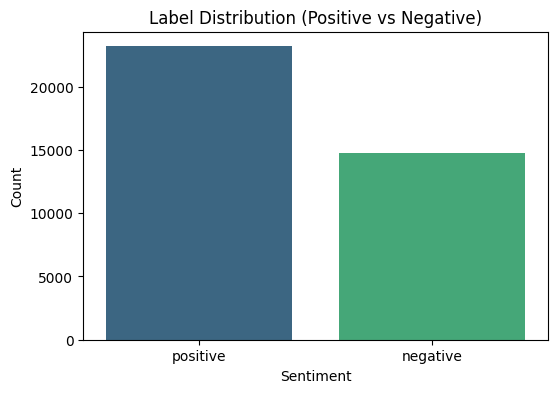

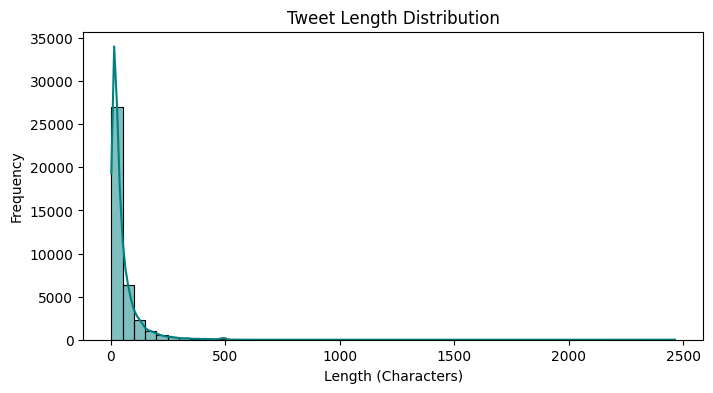

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\n2. Generating Exploratory Data Analysis (EDA) Report...")


plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df, palette='viridis')
plt.title('Label Distribution (Positive vs Negative)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


df['text_len'] = df['clean_text'].apply(len)
plt.figure(figsize=(8, 4))
sns.histplot(df['text_len'], bins=50, color='teal', kde=True)
plt.title('Tweet Length Distribution')
plt.xlabel('Length (Characters)')
plt.ylabel('Frequency')
plt.show()


3. Training Baseline Model (Logistic Regression)...
Baseline Model Results:
   - Accuracy: 86.65%
   - F1 Score: 86.52%

Classification Report:
              precision    recall  f1-score   support

    Negative       0.86      0.78      0.82      2960
    Positive       0.87      0.92      0.89      4638

    accuracy                           0.87      7598
   macro avg       0.87      0.85      0.86      7598
weighted avg       0.87      0.87      0.87      7598



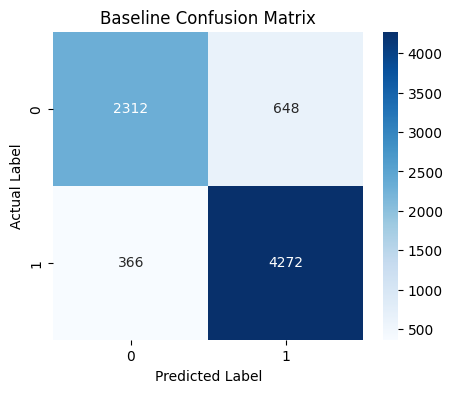

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

print("\n3. Training Baseline Model (Logistic Regression)...")


vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train_vec, y_train)


y_pred_lr = model_lr.predict(X_test_vec)


acc_baseline = accuracy_score(y_test, y_pred_lr)
f1_baseline = f1_score(y_test, y_pred_lr, average='weighted')

print("Baseline Model Results:")
print(f"   - Accuracy: {acc_baseline*100:.2f}%")
print(f"   - F1 Score: {f1_baseline*100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, target_names=['Negative', 'Positive']))


plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title('Baseline Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [6]:
!pip install transformers datasets accelerate -q

from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from transformers import EarlyStoppingCallback
from datasets import Dataset
import torch

print("\n4. Fine-tuning AraBERT Model (Transfer Learning)...")

train_dataset = Dataset.from_pandas(
    pd.DataFrame({
        "text": X_train,
        "labels": y_train.astype("int64")
    })
)
test_dataset = Dataset.from_pandas(
    pd.DataFrame({
        "text": X_test,
        "labels": y_test.astype("int64")
    })
)

model_name = "aubmindlab/bert-base-arabertv02-twitter"
tokenizer = AutoTokenizer.from_pretrained(model_name)

model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)
model.config.problem_type = "single_label_classification"

def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=64)

encoded_train = train_dataset.map(tokenize_function, batched=True)
encoded_test = test_dataset.map(tokenize_function, batched=True)

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    acc = accuracy_score(labels, predictions)
    f1 = f1_score(labels, predictions, average='weighted')
    return {"accuracy": acc, "f1": f1}

training_args = TrainingArguments(
    output_dir="./results",

    # Training length
    num_train_epochs=4,

    # Batch size (effective batch = 16 * grad_accum)
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    gradient_accumulation_steps=2,

    # Optimization
    learning_rate=1.5e-5,
    warmup_ratio=0.1,
    weight_decay=0.01,
    lr_scheduler_type="linear",

    # Evaluation & saving
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    greater_is_better=True,

    # Stability & speed
    fp16=True,
    max_grad_norm=1.0,

    # Logging
    logging_strategy="steps",
    logging_steps=100,

    # Reproducibility
    seed=42,

    report_to="none"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=encoded_train,
    eval_dataset=encoded_test,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
)

print("Starting training... (This may take a few minutes)")
trainer.train()

results_bert = trainer.evaluate()
acc_arabert = results_bert['eval_accuracy']
f1_arabert = results_bert['eval_f1']

print("\nAraBERT Final Results:")
print(f"   - Accuracy: {acc_arabert*100:.2f}%")
print(f"   - F1 Score: {f1_arabert*100:.2f}%")


4. Fine-tuning AraBERT Model (Transfer Learning)...


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at aubmindlab/bert-base-arabertv02-twitter and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/30392 [00:00<?, ? examples/s]

Map:   0%|          | 0/7598 [00:00<?, ? examples/s]

Starting training... (This may take a few minutes)


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.223600,0.246311,0.911161,0.910761
2,0.208000,0.255838,0.907476,0.906623
3,0.167700,0.268129,0.911556,0.911462
4,0.135600,0.292669,0.908529,0.908509



AraBERT Final Results:
   - Accuracy: 91.16%
   - F1 Score: 91.15%


In [8]:
output_dir = "my_gov_model"
print(f"Saving model to {output_dir}...")
model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

Saving model to my_gov_model...


('my_gov_model/tokenizer_config.json',
 'my_gov_model/special_tokens_map.json',
 'my_gov_model/vocab.txt',
 'my_gov_model/added_tokens.json',
 'my_gov_model/tokenizer.json')

In [9]:
import shutil
from google.colab import files

output_dir = "my_gov_model"


shutil.make_archive(output_dir, 'zip', output_dir)


'/content/my_gov_model.zip'

In [9]:
ARABIC_NEGATIVE_KEYWORDS = [
    # Basic negation particles
    'لا', 'لن', 'لم', 'ليس', 'ليست', 'ليسوا', 'لست', 'لسنا', 'لسن',
    'ما', 'غير', 'بدون', 'دون', 'بلا',

    # Colloquial/Egyptian negation (IMPORTANT for sarcasm)
    'محدش', 'مفيش', 'مافيش', 'ولا', 'مش', 'مو', 'موش',
    'ماحدش', 'محد', 'ماحد', 'مالوش', 'ملوش', 'مليش', 'ماليش',

    # Negative verbs and expressions
    'لا يوجد', 'لا توجد', 'لا اعتقد', 'لا افكر', 'لا اظن',
    'لا احب', 'لا اريد', 'لا استطيع', 'لا اقدر',
    'ما ينفعش', 'مينفعش', 'ما يصحش', 'مايصحش',

    # Negative adjectives and words
    'سيء', 'سيئ', 'سيئه', 'سيئين', 'فاشل', 'فشل', 'رديء', 'ردئ',
    'مقرف', 'قبيح', 'كريه', 'مزعج', 'محبط', 'مخيب',
    'ضعيف', 'سخيف', 'تافه', 'حقير', 'وحش', 'فظيع',
    'مرعب', 'مخيف', 'مؤلم', 'حزين', 'كئيب', 'محزن',
    'غاضب', 'زعلان', 'منزعج', 'مستاء', 'ساخط',
    'زباله', 'قمامه', 'خرا', 'تعبان', 'وسخ',

    # Negative phrases and warnings
    'لا يعجبني', 'لا يعجب', 'لا افضل', 'لا انصح', 'ما انصحش',
    'غير جيد', 'غير مقبول', 'غير صحيح', 'غير مناسب',
    'بدون فائده', 'بلا فائده', 'بلا معني', 'بدون معني',
    'ما تجربوش', 'ماتجربوش', 'ما تشتروش', 'ماتشتروش',
    'ما تنزلوش', 'ماتنزلوش', 'ينزله', 'تنزله', 'يشتريه', 'تشتريه',

    # Common negative expressions
    'للاسف', 'مع الاسف', 'يا للاسف', 'واحسرتاه',
    'مشكله', 'مشاكل', 'عيب', 'عيوب', 'خطا', 'اخطاء',
    'فاشل', 'خساره', 'خسران', 'ضرر', 'اضرار',
    'كارثه', 'كوارث', 'مصيبه', 'مصائب', 'ازمه', 'ازمات'
]

def has_negation(text):
    """
    Word-based negation detection using token matching.
    """
    tokens = text.split()
    neg_set = set(ARABIC_NEGATIVE_KEYWORDS)

    return any(token in neg_set for token in tokens)

def add_negation_feature(text):
    """
    Appends a special token if negation is detected to help the model context.
    """
    if has_negation(text):
        return  "سئ " + text
    return text

In [10]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import os
import sys
# from model import clean_text, add_negation_feature, has_negation

def predict_sentiment(text, model, tokenizer):
    cleaned_text = clean_text(text)
    text_with_negation = add_negation_feature(cleaned_text)

    # Use max_length=128 to match training configuration
    inputs = tokenizer(text_with_negation, return_tensors="pt", padding=True, truncation=True, max_length=128)

    with torch.no_grad():
        outputs = model(**inputs)

    logits = outputs.logits
    predicted_class_id = torch.argmax(logits, dim=-1).item()

    # Get confidence scores
    probabilities = torch.softmax(logits, dim=-1)[0]
    confidence = probabilities[predicted_class_id].item()

    # Label map from model.py: {'positive': 1, 'negative': 0}
    # So 0 is Negative, 1 is Positive
    sentiment = "Positive" if predicted_class_id == 1 else "Negative"
    has_neg = has_negation(cleaned_text)

    return sentiment, cleaned_text, text_with_negation, confidence, has_neg


def main():
    model_path = "my_gov_model"

    if not os.path.exists(model_path):
        print(f"Error: Model directory '{model_path}' not found.")
        print("Please run 'python model.py' first to train and save the model.")
        return

    print(f"Loading model from {model_path}...")
    try:
        tokenizer = AutoTokenizer.from_pretrained(model_path)
        model = AutoModelForSequenceClassification.from_pretrained(model_path)
    except Exception as e:
        print(f"Failed to load model: {e}")
        return

    print("Model loaded successfully!")
    print("Enter a sentence to predict its sentiment (or 'quit' to exit):")

    while True:
        user_input = input("\nInput: ")
        if user_input.lower() in ['quit', 'exit']:
            break

        if not user_input.strip():
            continue

        sentiment, cleaned, text_with_neg, confidence, has_neg = predict_sentiment(user_input, model, tokenizer)
        print(f"Cleaned Text: {cleaned}")
        print(f"Processed Text: {text_with_neg}")
        print(f"Contains Negation: {'Yes' if has_neg else 'No'}")
        print(f"Prediction: {sentiment} (Confidence: {confidence*100:.2f}%)")

if __name__ == "__main__":
    main()



Loading model from my_gov_model...
Model loaded successfully!
Enter a sentence to predict its sentiment (or 'quit' to exit):

Input: حلو محدش يستخدمه
Cleaned Text: حلو محدش يستخدمه
Processed Text: سئ حلو محدش يستخدمه
Contains Negation: Yes
Prediction: Negative (Confidence: 96.92%)

Input: جامد يارتكوا ما عملتوا 
Cleaned Text: جامد يارتكوا ما عملتوا
Processed Text: سئ جامد يارتكوا ما عملتوا
Contains Negation: Yes
Prediction: Negative (Confidence: 99.42%)

Input: فلاح
Cleaned Text: فلاح
Processed Text: فلاح
Contains Negation: No
Prediction: Positive (Confidence: 89.54%)

Input: بلاش فلح بقي
Cleaned Text: بلاش فلح بقي
Processed Text: بلاش فلح بقي
Contains Negation: No
Prediction: Negative (Confidence: 96.23%)

Input: فلح اوي
Cleaned Text: فلح اوي
Processed Text: فلح اوي
Contains Negation: No
Prediction: Positive (Confidence: 99.45%)

Input: ايه العبط ده جامد اوي
Cleaned Text: ايه العبط ده جامد اوي
Processed Text: ايه العبط ده جامد اوي
Contains Negation: No
Prediction: Negative (Confidence

KeyboardInterrupt: Interrupted by user